In [2]:
import pandas as pd
import numpy as np

import pickle as pk
#import xgboost as xgb

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [3]:
pd.set_option("display.max_rows", 8)

## Only GP

In [7]:
#df = pd.read_pickle("../../data/processed/df_20features_redshift.pkl")
df = pd.read_pickle("2df_GP_scikit.pkl")
df_labels = pd.read_pickle("../../data/df_labels.pkl")

In [5]:
df

,ID,desg,desi,desr,desz,Xaxis,desg_GP,desi_GP,desr_GP,desz_GP
0,SN554563,"[[0.0, 18.98, 10.49], [1.985000000000582, 0.89...","[[0.03200000000651926, 8.001, 9.313], [10.9610...","[[2.0, 5.875, 2.431], [10.121000000006461, 6.9...","[[15.993000000002212, 1.763, 6.543], [29.95700...","[0.0, 1.4326868686868988, 2.8653737373737975, ...","([0.0, 1.3517272727273086, 2.7034545454546173,...","([0.03200000000651926, 1.4642525252590228, 2.8...","([2.0, 3.412292929292957, 4.824585858585914, 6...","([15.993000000002212, 17.264141414143634, 18.5..."
1,SN454964,"[[0.0, 4.359, 6.2], [4.9799999999959255, 33.82...","[[0.010999999998603016, 3.629, 6.148], [4.9959...","[[0.004000000000814907, 0.8701, 3.584], [14.21...","[[5.004000000000815, 4.406, 7.695], [24.139999...","[0.0, 1.2527575757575864, 2.505515151515173, 3...","([0.0, 1.1215252525252062, 2.2430505050504124,...","([0.010999999998603016, 1.253707070705658, 2.4...","([0.004000000000814907, 1.24669696969773, 2.48...","([5.004000000000815, 6.206212121212938, 7.4084..."
2,SN537864,"[[0.0, 0.4987, 4.764], [11.969000000004598, 8....","[[4.105999999999767, 1.357, 3.683], [13.090000...","[[0.008000000001629815, 3.18, 2.13], [13.07899...","[[3.0750000000043656, 1.838, 3.729], [4.137000...","[0.0, 1.1715252525252502, 2.3430505050505004, ...","([0.0, 1.1417777777777784, 2.283555555555557, ...","([4.105999999999767, 5.236050505050272, 6.3661...","([0.008000000001629815, 1.1792828282844798, 2....","([3.0750000000043656, 4.214080808085176, 5.353..."
3,SN528418,"[[0.0, 4.402, 4.787], [2.0, 4.78, 2.24], [11.9...","[[0.031000000002677552, 1.92, 5.436], [2.15600...","[[0.01600000000325963, 4.441, 5.335], [10.0, 0...","[[0.06199999999807915, 8.656, 4.694], [2.18699...","[0.0, 1.5946565656565574, 3.189313131313115, 4...","([0.0, 1.453161616161665, 2.90632323232333, 4....","([0.031000000002677552, 1.6152424242450665, 3....","([0.01600000000325963, 1.5903737373769724, 3.1...","([0.06199999999807915, 1.6560303030283934, 3.2..."
...,...,...,...,...,...,...,...,...,...,...
21313,SN710827,"[[0.0, 11.09, 4.807], [2.0, 14.44, 2.281], [9....","[[0.031000000002677552, 23.73, 5.457], [2.1560...","[[0.01600000000325963, 18.35, 5.349], [2.13999...","[[0.06199999999807915, 17.6, 4.704], [2.186999...","[0.0, 1.0607272727272974, 2.1214545454545948, ...","([0.0, 0.818888888888886, 1.637777777777772, 2...","([0.031000000002677552, 1.0211010101036553, 2....","([0.01600000000325963, 1.076565656568908, 2.13...","([0.06199999999807915, 1.0615656565637575, 2.0..."
21314,SN51813,"[[14.859000000004016, 11.64, 11.89], [30.91799...","[[12.984000000004016, 5.321, 4.986], [22.88599...","[[0.0, 1.53, 1.444], [14.86699999999837, 2.602...","[[2.014999999999418, 3.934, 3.402], [13.014999...","[0.0, 0.7759595959595931, 1.5519191919191861, ...","([14.859000000004016, 15.47476767677165, 16.09...","([12.984000000004016, 13.628808080812053, 14.2...","([0.0, 0.7659393939394075, 1.531878787878815, ...","([2.014999999999418, 2.7200606060600188, 3.425..."
21315,SN599115,"[[0.0, 3.229, 7.693], [10.014999999999418, 1.1...","[[0.027000000001862645, 8.224, 5.11], [3.01099...","[[1.0, 0.9777, 3.85], [2.0429999999978463, 0.4...","[[1.0429999999978463, 2.444, 4.848], [2.085999...","[0.0, 1.2428181818181518, 2.4856363636363037, ...","([0.0, 0.9397070707070243, 1.8794141414140486,...","([0.027000000001862645, 1.269262626264456, 2.5...","([1.0, 2.2322828282828198, 3.46456565656564, 4...","([1.0429999999978463, 2.275282828280666, 3.507..."
21316,SN308423,"[[29.875, 4.829, 11.89], [53.88699999999517, 9...","[[0.0, 2.278, 4.54], [7.995999999999185, 3.879...","[[2.069999999999709, 0.06183, 1.853], [23.0239...","[[0.01999999999679858, 6.346, 3.061], [30.0159...","[0.0, 0.9276363636363202, 1.8552727272726404, ...","([29.875, 30.44022222222217, 31.00544444444434...","([0.0, 0.9276363636363202, 1.8552727272726404,...","([2.069999999999709, 2.9667070707067555, 3.863...","([0.01999999999679858, 0.8968888888856681, 1.7..."


In [8]:
df_labels

,ID,type,type_bool
0,SN554563,II,False
1,SN454964,II,False
2,SN537864,II,False
3,SN528418,II,False
...,...,...,...
21313,SN710827,II,False
21314,SN51813,Ia,True
21315,SN599115,II,False
21316,SN308423,Ib,False


In [16]:
print('O valor máximo é : ', 

print('O valor mínimo é : ', 

print('O valor é : ', 

print('O valor é :', df.REDSHIFT_SPEC.min()

0.02325

In [31]:
df.REDSHIFT_SPEC.describe()

count    21317.000000
mean         0.668943
std          0.236618
min          0.023250
25%          0.485700
50%          0.667220
75%          0.859090
max          1.115250
Name: REDSHIFT_SPEC, dtype: float64

In [17]:
df.REDSHIFT_SPEC.max()

1.11525

In [18]:
df.REDSHIFT_SPEC.mean()

0.6689427930759487

In [19]:
df.REDSHIFT_SPEC.median()

0.66722

In [20]:
df.REDSHIFT_SPEC.mode()

0    0.70404
dtype: float64

In [5]:
splits = int(len(df)/1100)

X_real = df.loc[:,'f1':'f20']
y_real = np.array(df.REDSHIFT_SPEC)

kf_real = KFold(n_splits = splits)
X_true_test = []
X_to_train = []
y_true_test = []
y_to_train = []
for train_index_real, test_index_real in kf_real.split(X_real):
    print("X_true_test:", train_index_real, "X_to_train:", test_index_real)
    X_true_test.append(X_real.iloc[train_index_real])
    X_to_train.append(X_real.iloc[test_index_real])
    y_true_test.append(y_real[train_index_real])
    y_to_train.append(y_real[test_index_real])

X_true_test: [ 1122  1123  1124 ... 21314 21315 21316] X_to_train: [   0    1    2 ... 1119 1120 1121]
X_true_test: [    0     1     2 ... 21314 21315 21316] X_to_train: [1122 1123 1124 ... 2241 2242 2243]
X_true_test: [    0     1     2 ... 21314 21315 21316] X_to_train: [2244 2245 2246 ... 3363 3364 3365]
X_true_test: [    0     1     2 ... 21314 21315 21316] X_to_train: [3366 3367 3368 ... 4485 4486 4487]
X_true_test: [    0     1     2 ... 21314 21315 21316] X_to_train: [4488 4489 4490 ... 5607 5608 5609]
X_true_test: [    0     1     2 ... 21314 21315 21316] X_to_train: [5610 5611 5612 ... 6729 6730 6731]
X_true_test: [    0     1     2 ... 21314 21315 21316] X_to_train: [6732 6733 6734 ... 7851 7852 7853]
X_true_test: [    0     1     2 ... 21314 21315 21316] X_to_train: [7854 7855 7856 ... 8973 8974 8975]
X_true_test: [    0     1     2 ... 21314 21315 21316] X_to_train: [ 8976  8977  8978 ... 10095 10096 10097]
X_true_test: [    0     1     2 ... 21314 21315 21316] X_to_train: 

In [6]:
len(X_true_test)

19

In [7]:
preds_arr = []
rmse_arr = []
matrices_arr = []
true_preds = []
true_rms = []
models = []

for i in range(len(X_true_test)):
    X_ = X_to_train[i]
    y_ = y_to_train[i]
    data_dmatrix = xgb.DMatrix(data=X_,label=y_)
    kf = KFold(n_splits = 5)
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    
    for train_index, test_index in kf.split(X_):
        X_train.append(X_.iloc[train_index])
        X_test.append(X_.iloc[test_index])
        y_train.append(y_[train_index])
        y_test.append(y_[test_index])
    
    for j in range(len(X_train)):
        xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
        xg_reg.fit(X_train[j],y_train[j])
        print("Fitting " + str(i) + str(j) + 'th model' )
        
        preds_arr.append(xg_reg.predict(X_test[j]))
        rmse_arr.append(np.sqrt(mean_squared_error(y_test[j], preds_arr[-1])))
        matrices_arr.append(np.round((abs(y_test[j]-preds_arr[-1])/y_test[j])*100))
        
        true_preds.append(xg_reg.predict(X_true_test[i]))
        true_rms.append(np.sqrt(mean_squared_error(y_true_test[i], true_preds[-1])))
        
        models.append(xg_reg)

[18:12:59] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 00th model
[18:12:59] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 01th model
[18:12:59] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 02th model
[18:12:59] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 03th model
[18:12:59] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 04th model
[18:12:59] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10th model
[18:12:59] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederro

Fitting 120th model
[18:13:02] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 121th model
[18:13:02] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 122th model
[18:13:02] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 123th model
[18:13:02] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 124th model
[18:13:02] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 130th model
[18:13:02] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 131th model
[18:13:02] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated i

In [8]:
len(true_rms)

95

In [9]:
true_rms

[0.21700446499056594,
 0.21950452179297292,
 0.21818871109224308,
 0.2172407295359099,
 0.2163457513690047,
 0.2173698025516531,
 0.21821475002489607,
 0.21788227528874407,
 0.2213536138510811,
 0.21849954138719271,
 0.21579871884889626,
 0.2151566174444846,
 0.21609948666724735,
 0.21496632111687197,
 0.2148764557341527,
 0.22122007515758663,
 0.22210032810023245,
 0.2219970568889372,
 0.2209136742656542,
 0.22083813742688493,
 0.21471296080856098,
 0.21606272712523436,
 0.21743689424176926,
 0.21576389836381654,
 0.2167537179319288,
 0.21723155270768893,
 0.2173780136327583,
 0.21545121167108094,
 0.21490725764438998,
 0.21721048956394784,
 0.21533460318558167,
 0.2154086385344408,
 0.21522655124349035,
 0.21523523513803786,
 0.2139686527800813,
 0.2119151784620243,
 0.21182420880839437,
 0.21368169503061943,
 0.21470141344881952,
 0.21350329058253736,
 0.21460068828901643,
 0.21607737254341317,
 0.21717899414739258,
 0.21629123800277447,
 0.2176488943324479,
 0.21724133417013852,
 0

In [10]:
models

[XGBRegressor(alpha=10, base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=0, num_parallel_tree=1,
              objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None),
 XGBRegressor(alpha=10, base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_est

# Normal Linear Regression

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [49]:
reg = linear_model.LinearRegression()

In [33]:
x = X_train[-1]

In [37]:
x['target'] = y_train[-1]

/home/felipe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
x

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f12,f13,f14,f15,f16,f17,f18,f19,f20,target
ID,,,,,,,,,,,,,,,,,,,,,
SN853870,-629.395000,303.270839,12.595323,33.698785,61.524145,107.912514,-16.591236,78.319608,54.015820,-25.883775,...,18.025200,23.240546,45.436183,-10.717777,51.434519,7.823082,14.069987,13.366617,18.941023,0.78647
SN853902,-403.577648,192.270572,155.156949,28.503750,48.944647,47.081357,43.389724,32.283089,46.477502,-26.778500,...,15.797907,0.430205,-0.923832,-22.369607,-30.614164,-44.732063,-0.913544,11.317149,-5.057367,0.57723
SN853969,-467.981212,347.719269,55.226117,-44.268730,187.833934,77.768725,-70.415631,44.665149,68.788016,-81.759981,...,26.117386,30.663687,79.998134,3.568942,47.505044,20.833676,-16.535656,10.688689,1.569014,0.82993
SN853988,206.697561,-922.440812,-687.318818,347.743523,374.290916,60.136555,-39.396776,-205.215301,131.837778,40.200574,...,-18.061148,-26.281115,-115.586944,239.899460,-36.647179,-140.957871,83.598433,187.608737,51.442211,0.53846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SN889448,-651.160018,125.051448,-144.373569,99.733687,24.222243,87.587307,98.619099,75.010385,50.674811,-42.103153,...,-12.616121,-21.721253,-16.540688,-92.363507,21.027210,47.196277,-18.950516,-40.478649,-27.035689,0.93669
SN889502,-549.305606,363.176014,-48.513350,24.329160,5.761858,122.775215,-6.807005,68.983099,13.455541,-14.603582,...,15.827956,5.953496,20.170417,3.460617,-6.009495,-8.892416,-1.746711,-15.610291,-4.720978,0.44127
SN889601,-398.956615,167.277835,-42.545553,7.442509,8.130408,20.720640,35.182567,44.023975,-21.817749,-3.855144,...,0.394047,3.677997,15.461803,6.416959,-7.194665,29.776331,8.357631,36.651304,19.108292,0.50331
SN889642,-295.898559,297.202399,-34.125555,13.815035,35.849094,58.891053,-41.956630,1.834201,-111.401344,-28.097156,...,5.665985,4.035805,20.086595,49.950037,-31.388733,7.583459,9.997335,9.807498,-17.450555,0.91502


In [39]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(x)

col = x.columns
new_data = pd.DataFrame(data_scaled, columns=col)

In [40]:
new_data

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f12,f13,f14,f15,f16,f17,f18,f19,f20,target
0,-0.299377,0.246067,0.046648,0.156361,0.167691,0.369178,-0.036740,0.255811,0.119793,-0.252697,...,0.217492,0.108364,0.334935,-0.067897,0.477564,0.084738,0.053375,0.210261,0.242915,0.479799
1,-0.183171,0.168660,0.233068,0.136186,0.132883,0.177529,0.132998,0.112427,0.100193,-0.259776,...,0.194442,-0.018507,0.015335,-0.165903,-0.393953,-0.387040,-0.053500,0.182654,-0.092556,-0.431698
2,-0.216313,0.277063,0.102394,-0.146434,0.517193,0.274210,-0.189055,0.150992,0.158201,-0.694769,...,0.301236,0.149652,0.573201,0.052272,0.435826,0.201531,-0.164930,0.174188,0.000073,0.669120
3,0.130880,-0.608692,-0.868587,1.375988,1.033124,0.218659,-0.101276,-0.627280,0.322133,0.270137,...,-0.155957,-0.167075,-0.775138,2.040096,-0.458035,-1.250840,0.549311,2.557359,0.697245,-0.600589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.310578,0.121784,-0.158610,0.412815,0.064476,0.305143,0.289290,0.245504,0.111106,-0.381019,...,-0.099608,-0.141713,-0.092326,-0.754636,0.154579,0.438183,-0.182155,-0.515053,-0.399789,1.134191
887,-0.258163,0.287842,-0.033260,0.119973,0.013395,0.416003,-0.009052,0.226732,0.014334,-0.163453,...,0.194753,0.012214,0.160756,0.051360,-0.132603,-0.065314,-0.059443,-0.180068,-0.087854,-1.023971
888,-0.180793,0.151231,-0.025456,0.054392,0.019949,0.094479,0.109773,0.148995,-0.077377,-0.078415,...,0.035031,-0.000442,0.128295,0.076227,-0.145192,0.281808,0.012630,0.523913,0.245253,-0.753711
889,-0.127759,0.241835,-0.014446,0.079140,0.096647,0.214735,-0.108520,0.017591,-0.310298,-0.270209,...,0.089589,0.001548,0.160178,0.442392,-0.402180,0.082587,0.024326,0.162318,-0.265799,1.039792


In [24]:
learning_rate = 0.1 
interations = 1000 # número de interações

theta = np.array([0,0])

In [42]:
y = y_train[-1]

In [43]:
x = X_train[-1]

In [ ]:
col = ['Body Weight', 'Brain Weight']
new_data = pd.DataFrame(data_scaled, columns=col)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
true_rms

[0.21700446499056594,
 0.21950452179297292,
 0.21818871109224308,
 0.2172407295359099,
 0.2163457513690047,
 0.2173698025516531,
 0.21821475002489607,
 0.21788227528874407,
 0.2213536138510811,
 0.21849954138719271,
 0.21579871884889626,
 0.2151566174444846,
 0.21609948666724735,
 0.21496632111687197,
 0.2148764557341527,
 0.22122007515758663,
 0.22210032810023245,
 0.2219970568889372,
 0.2209136742656542,
 0.22083813742688493,
 0.21471296080856098,
 0.21606272712523436,
 0.21743689424176926,
 0.21576389836381654,
 0.2167537179319288,
 0.21723155270768893,
 0.2173780136327583,
 0.21545121167108094,
 0.21490725764438998,
 0.21721048956394784,
 0.21533460318558167,
 0.2154086385344408,
 0.21522655124349035,
 0.21523523513803786,
 0.2139686527800813,
 0.2119151784620243,
 0.21182420880839437,
 0.21368169503061943,
 0.21470141344881952,
 0.21350329058253736,
 0.21460068828901643,
 0.21607737254341317,
 0.21717899414739258,
 0.21629123800277447,
 0.2176488943324479,
 0.21724133417013852,
 0

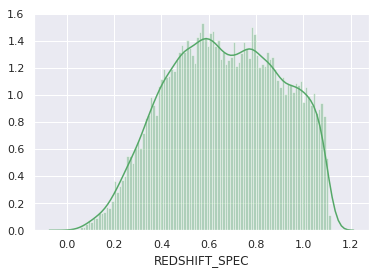

In [12]:
fig, ax = plt.subplots()
sns.distplot(df.REDSHIFT_SPEC, bins=100, color="g", ax=ax)
plt.show()

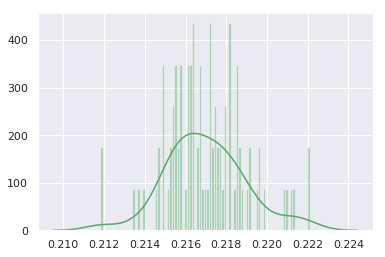

In [13]:
fig, ax = plt.subplots()
sns.distplot(true_rms, bins=85, color="g", ax=ax)
plt.show()

0.21177491083620437

In [14]:
((np.array(true_rms).max() - np.array(true_rms).min())/np.array(true_rms).max())*100

4.626791585467868